Objective: Starting from Joyce's optimized distal-input TMS simulation, modify so that the input hits only a portion of the cells in the column as opposed to all of them, modeling how TMS would only activate a portion of the supragranular axons providing distal input. Also, add a current injection to the somas of a portion of each cell type to model how TMS activates a portion of their axons directly, which then causes current to reach the soma through the AP propagating backwards from the axon.

Tuning will come last, but the distal input modification should simply involve including the probability parameter, assuming it works as expected.

The soma current injection which models direct activation by TMS is the main distinguishing addition. This could be accomplished with another drive that hits the somas, but requires changing the allowed synapses to the somas of pyramidal cells and introduces the nuances of synaptic dynamics. The ideal approach would be to add a current injection rather than a synapse, which could be achieve with HNN's tonic bias, except that the bias cannot target cells based on probability.


In [1]:
import hnn_core
from hnn_core import calcium_model, read_params, simulate_dipole, average_dipoles, read_dipole, MPIBackend
from hnn_core.viz import plot_dipole
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import pickle
import numpy as np
import json
import os

%matplotlib inline

In [2]:
exp_dpl = read_dipole('optimization_files/BETA09_s1loc_10mm.txt')
exp_dpl_cpy = deepcopy(exp_dpl)
exp_dpl_cpy.times *= 1000  # convert to ms

In [3]:
direct_init_dpl = read_dipole('optimization_files/init_direct/dpl.txt')
direct_opt_limited_dpl = read_dipole('optimization_files/direct_opt_limited/av_dpl.txt')
direct_opt_full_dpl = read_dipole('optimization_files/direct_opt_full/av_dpl.txt')
distal_opt_dpl = read_dipole('optimization_files/BETA9_distal/av_dpl.txt')


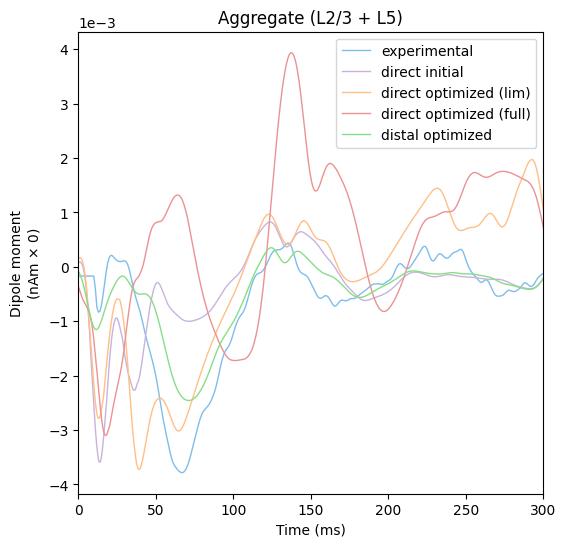

In [4]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 6))

scale_factor = 0.1
smooth_window_len = 20

direct_init_dpl_plot = deepcopy(direct_init_dpl)
direct_init_dpl_plot.scale(scale_factor)
direct_init_dpl_plot.smooth(smooth_window_len)

direct_opt_limited_dpl_plot = deepcopy(direct_opt_limited_dpl)
direct_opt_limited_dpl_plot.scale(scale_factor)
direct_opt_limited_dpl_plot.smooth(smooth_window_len)

direct_opt_full_dpl_plot = deepcopy(direct_opt_full_dpl)
direct_opt_full_dpl_plot.scale(scale_factor)
direct_opt_full_dpl_plot.smooth(smooth_window_len)

distal_opt_dpl_plot = deepcopy(distal_opt_dpl)
distal_opt_dpl_plot.scale(scale_factor)
distal_opt_dpl_plot.smooth(smooth_window_len)

exp_dpl_cpy.plot(ax=axes, layer='agg', show=False, color='tab:blue')
direct_init_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:purple')
direct_opt_limited_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:orange')
direct_opt_full_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:red')
distal_opt_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:green')
axes.legend(['experimental', 'direct initial', 'direct optimized (lim)', 'direct optimized (full)', 'distal optimized'])
# optim.net_.cell_response.plot_spikes_hist(ax=axes[1], show=False)
plt.show()

TypeError: 'Dipole' object is not subscriptable

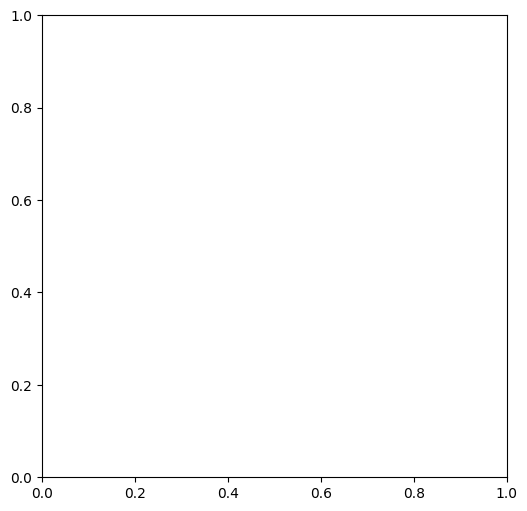

In [5]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 6))

scale_factor = 0.1
smooth_window_len = 20

direct_init_dpl_plot = deepcopy(direct_init_dpl)[0]
direct_init_dpl_plot.scale(scale_factor)
direct_init_dpl_plot.smooth(smooth_window_len)

direct_opt_dpl_plot = average_dipoles(direct_opt_dpls)
direct_opt_dpl_plot.scale(scale_factor)
direct_opt_dpl_plot.smooth(smooth_window_len)

distal_opt_dpl_plot = average_dipoles(distal_opt_dpls)
distal_opt_dpl_plot.scale(scale_factor)
distal_opt_dpl_plot.smooth(smooth_window_len)

exp_dpl_cpy.plot(ax=axes, layer='agg', show=False, color='tab:blue')
direct_init_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:orange')
direct_opt_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:red')
distal_opt_dpl_plot.plot(ax=axes, layer='agg', show=False, color='tab:green')
axes.legend(['experimental', 'direct initial', 'direct optimized', 'distal optimized'])
# optim.net_.cell_response.plot_spikes_hist(ax=axes[1], show=False)
plt.show()

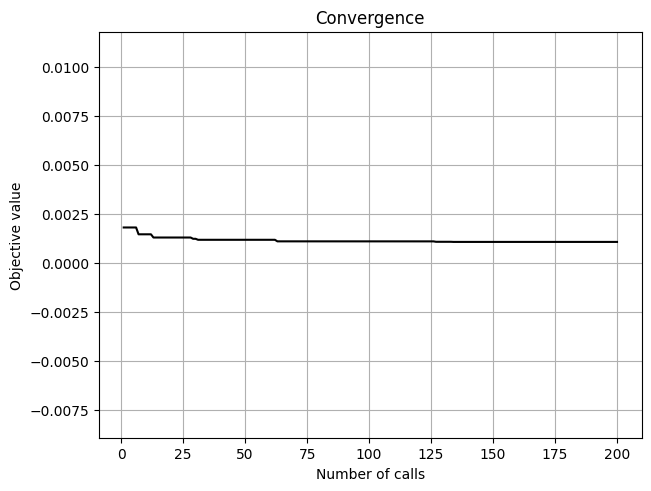

In [ ]:
fig1 = optim.plot_convergence(show=False)
plt.show()